## Evariste Manirumva
## Ministry of Finance and Economic Planning (MINECOFIN)
## AIMS DSCBI Cohort I

# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [3]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [4]:
# show all rows of a DataFrame
pd.set_option("display.max_rows", None) 
# Uncomment the following lines and add your code to define the directories and files

DIR_DATA = Path.cwd().parents[2].joinpath("Data")

# Set up health data from DHS
FILE_RW_HEALTH = DIR_DATA/"RW-Health-Data.xlsx"

# Population by by districts for Rwanda
FILE_POP_MW = DIR_DATA/"rwa-cell-pop.csv"

# Set up nightlights data
FILE_Nightlight_RW = DIR_DATA/"cell-ntl-2015-2020-2024.csv"


# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

In [15]:
# Load all data sets

df_rw_health     = pd.read_excel(FILE_RW_HEALTH)
df_rw_pop        = pd.read_csv(FILE_POP_MW)
df_rw_nightlight = pd.read_csv(FILE_Nightlight_RW)


# Subnational dataframes: Read specific data sheets from main health data file
dhs_mobile_sub         = pd.read_excel(FILE_RW_HEALTH, sheet_name="dhs-mobile_subnational_rwa")
access_health_care_sub = pd.read_excel(FILE_RW_HEALTH, sheet_name="access-to-health-care_subnation")
child_mortality_rate_sub  = pd.read_excel(FILE_RW_HEALTH, sheet_name="child-mortality-rates_subnation")
 
df_rw_nightlight.head()

,cell_id,prov_name,dist_name,sect_name,province_name,district_name,sector_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143


In [16]:
# Processing data files
# Visualize and browse datasets
df_rw_nightlight.head(50)
df_rw_pop.head()
df_rw_health.head(50)

dhs_mobile_sub.head(50)
access_health_care_sub.tail(50)
child_mortality_rate_sub.head(50)
dhs_mobile_sub.size


172950

In [17]:
# Generate national level summaries
# Grouping/aggregating data using key common columns in 3 dataframes: use the aggregate funtion/method i.e., mean, sum
dhs_mobile_sub = dhs_mobile_sub[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index() # Converts the grouped result back into a regular DataFrame (instead of a Series with a MultiIndex)
access_health_care_sub = dhs_mobile_sub[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index()
child_mortality_rate_sub = child_mortality_rate_sub[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index()
access_health_care_sub.head(50)

,SurveyType,SurveyYear,Location,Indicator,Value
0,DHS,1992,Butare,Antenatal visits for pregnancy: 4+ visits,12.6
1,DHS,1992,Butare,Assistance during delivery from a skilled prov...,31.3
2,DHS,1992,Butare,BCG vaccination received,94.4
3,DHS,1992,Butare,Child mortality rate,94.0
4,DHS,1992,Butare,Children stunted,59.0
5,DHS,1992,Butare,Children underweight,34.3
6,DHS,1992,Butare,Children wasted,4.0
7,DHS,1992,Butare,Children with ARI for whom advice or treatment...,45.1
8,DHS,1992,Butare,Children with diarrhea,26.1
9,DHS,1992,Butare,Children with fever for whom advice or treatme...,42.45


In [ ]:
# renaming variables in the dataframe
dhs_mobile_sub = dhs_mobile_sub.rename(columns={"Value":"Mean_value"})
access_health_care_sub = access_health_care_sub.rename(columns={"Value":"Mean_value"})
child_mortality_rate_sub = child_mortality_rate_sub.rename(columns={"Value":"Mean_value"})
dhs_mobile_sub.tail()

,SurveyType,SurveyYear,Location,Indicator,Mean_value
4311,MIS,2017,West,Pregnant women who slept under an insecticide-...,73.2
4312,MIS,2017,West,Total fertility rate 15-49,4.6
4313,MIS,2017,West,Women who are literate,80.3
4314,MIS,2017,West,Women with no education,12.5
4315,MIS,2017,West,Women with secondary or higher education,22.9


In [19]:
# Merge/vertical append the subnational dataframes into one master df
sub_level_indicator_df = pd.concat([dhs_mobile_sub, access_health_care_sub, child_mortality_rate_sub], ignore_index=True)
sub_level_indicator_df.head()
# Save the a converted to csv file
sub_level_indicator = sub_level_indicator_df.to_csv("sub_level_indicator.csv")
sub_level_indicator_df.size         # vertical append increased number of rows(almost double) in the df
sub_level_indicator_df.head()

,SurveyType,SurveyYear,Location,Indicator,Mean_value
0,DHS,1992,Butare,Antenatal care from a skilled provider,89.6
1,DHS,1992,Butare,Antenatal visits for pregnancy: 4+ visits,12.6
2,DHS,1992,Butare,Assistance during delivery from a skilled prov...,31.3
3,DHS,1992,Butare,BCG vaccination received,94.4
4,DHS,1992,Butare,Child mortality rate,94.0


## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions

In [21]:
 # Call relevant dataframes
df_rw_pop        = pd.read_csv(FILE_POP_MW)
df_rw_nightlight = pd.read_csv(FILE_Nightlight_RW)
sub_level_indicator_df. head(100)

,SurveyType,SurveyYear,Location,Indicator,Mean_value
0,DHS,1992,Butare,Antenatal care from a skilled provider,89.6
1,DHS,1992,Butare,Antenatal visits for pregnancy: 4+ visits,12.6
2,DHS,1992,Butare,Assistance during delivery from a skilled prov...,31.3
3,DHS,1992,Butare,BCG vaccination received,94.4
4,DHS,1992,Butare,Child mortality rate,94.0
5,DHS,1992,Butare,Children stunted,59.0
6,DHS,1992,Butare,Children underweight,34.3
7,DHS,1992,Butare,Children wasted,4.0
8,DHS,1992,Butare,Children with ARI for whom advice or treatment...,45.1
9,DHS,1992,Butare,Children with diarrhea,26.1


In [38]:
# Calculation of key demographic indicators from pop dataframe
# Dependency ratio(% of dependent pop in tot working pop) and insert it in the dataframe for use
working_age_pop = df_rw_pop["general_2020"] - (df_rw_pop["elderly_60_plus_2020"] + df_rw_pop["children_under_five_2020"])
dependency_ratio = (df_rw_pop["elderly_60_plus_2020"] + df_rw_pop["children_under_five_2020"]) / working_age_pop * 100
df_rw_pop["working_age_pop"] = working_age_pop
df_rw_pop['dependency_ratio'] = dependency_ratio

# people per building and insert it in the dataframe for use
people_per_building = df_rw_pop["general_2020"] / df_rw_pop["building_count"]
df_rw_pop['people_per_building'] = people_per_building

df_rw_pop[['dependency_ratio', 'people_per_building','working_age_pop']]
df_rw_pop['dependency_ratio'].mean

<bound method Series.mean of 0       23.636816
1       23.587041
2       23.556439
3       23.498243
4       23.991983
5       24.006595
6       24.000870
7       24.237003
8       23.982328
9       25.138168
10      25.279887
11      25.443516
12      25.467577
13      25.450685
14      25.443516
15      24.046589
16      23.820021
17      23.093187
18      24.279661
19      24.332324
20      24.332071
21      24.366938
22      21.619243
23      22.164370
24      22.056998
25      22.134070
26      22.130434
27      23.089669
28      23.089669
29      23.800801
30      25.709087
31      25.727957
32      25.731972
33      25.632454
34      21.006843
35      21.487994
36      21.156546
37      21.030436
38      22.622127
39      22.614469
40      22.580503
41      22.639061
42      23.942877
43      24.759655
44      23.921091
45      23.783205
46      22.781521
47      23.158714
48      23.140640
49      23.165428
50      23.414539
51      23.235659
52      23.309766
53      23.361925

# Nightlight data processing and descriptive data analysis

In [23]:
# Nightlight data processing and descriptive data analysis
# Accesses/sort the year column of your DataFrame & True for rows where the year is either 2015 or 2024.
# Filter the DataFrame, keeping only rows with year 2015 or 2024.
df_rw_nightlight_sub = df_rw_nightlight[df_rw_nightlight["year"].isin([2015, 2024])]
df_rw_nightlight_sub['year']

df_rw_nightlight_sub = df_rw_nightlight_sub.sort_values(["prov_name", "dist_name", "sect_name", "cell_name", "year"])
df_rw_nightlight_sub[["prov_name", "dist_name", "sect_name", "cell_name", "year"]].head(100)
df_rw_nightlight_sub["total_nightlight"]

2          1.900350
1         11.608531
5          1.536613
4         10.771848
8          1.445172
7         10.102386
11         2.817203
10        17.876629
14         3.647937
13        24.716045
17         3.286101
16        38.952652
20         2.343821
19        16.388893
23         3.460686
22        29.824253
26         5.042166
25        32.322475
29         1.419316
28        10.648127
32         1.892179
31        11.920998
35         1.727054
34        11.966524
38         1.509496
37        11.573877
41         3.448792
40        23.766569
44         1.749543
43        18.687042
47         3.667518
46        14.734644
50         2.452481
49        17.005829
53         2.331432
52        14.646242
56         2.232275
55        11.672194
59         2.747952
58        18.523438
62         2.489359
61        13.409756
65         3.245272
64        16.829292
68         2.592242
67        14.086582
71         3.750803
70        18.869883
74         3.353962
73        22.367466


In [24]:
# percentage change in total nightlight from 2015-2024 sorted as per location indicators (YOY % change)
df_rw_nightlight_sub["pct_nightlight_ch"] = (
    df_rw_nightlight_sub.groupby(["prov_name", "dist_name", "sect_name", "cell_name"])["total_nightlight"].pct_change() * 100)
df_rw_nightlight_sub["pct_nightlight_ch"]

2               NaN
1        510.862720
5               NaN
4        601.012355
8               NaN
7        599.043610
11              NaN
10       534.552323
14              NaN
13       577.534952
17              NaN
16      1085.375858
20              NaN
19       599.238314
23              NaN
22       761.801774
26              NaN
25       541.043492
29              NaN
28       650.229673
32              NaN
31       530.014142
35              NaN
34       592.886602
38              NaN
37       666.737632
41              NaN
40       589.127360
44              NaN
43       968.110089
47              NaN
46       301.760603
50              NaN
49       593.413200
53              NaN
52       528.207899
56              NaN
55       422.883468
59              NaN
58       574.081439
62              NaN
61       438.683152
65              NaN
64       418.578727
68              NaN
67       443.413133
71              NaN
70       403.089174
74              NaN
73       566.896785


In [25]:
df_rw_nightlight_sub.groupby(["prov_name", "dist_name", "sect_name", "cell_name"])["total_nightlight"]
df_rw_nightlight_sub["pct_nightlight_change"] = df_rw_nightlight_sub["total_nightlight"].pct_change() * 100
df_rw_nightlight_sub[["pct_nightlight_ch","pct_nightlight_change"]]
df_rw_nightlight_sub = df_rw_nightlight_sub.drop("pct_nightlight_change", axis=1)

In [34]:
# mean percentage change nightlight from 2015-2024 sorted as per location indicators
df_rw_nightlight_sub["mean_pct_nightlight_chang"] = df_rw_nightlight_sub["pct_nightlight_ch"].mean
df_rw_nightlight_sub["mean_pct_nightlight_ch"] = (
    df_rw_nightlight_sub.groupby(["prov_name", "dist_name", "sect_name", "cell_name"])["mean_nightlight"].pct_change() * 100)
#df_rw_nightlight_sub[['mean_pct_nightlight_ch', 'pct_nightlight_chang']]
df_rw_nightlight_sub = df_rw_nightlight_sub.drop("mean_pct_nightlight_chang", axis=1)

df_rw_nightlight_sub["lit_pixel_pct"] = df_rw_nightlight_sub["lit_pixel_count"] / df_rw_nightlight_sub["pixel_count"] * 100
df_rw_nightlight_sub[["lit_pixel_pct","lit_pixel_percentage"]]. head(50).round(3)


,lit_pixel_pct,lit_pixel_percentage
2,37.143,37.143
1,37.143,37.143
5,42.857,42.857
4,42.857,42.857
8,43.333,43.333
7,43.333,43.333
11,43.434,43.434
10,43.434,43.434
14,44.444,44.444
13,44.444,44.444


In [41]:
# Data integration: merge dataframe using selected columns/variables
# Retrieve the col headers/vars of df relevant for merge
pd.set_option("display.max_columns", None)
nightlight_sub_col_merge  = list(df_rw_nightlight_sub.columns)
nightlight_sub_col_merge = [nightlight_sub_col_merge[0]] + nightlight_sub_col_merge[8:]
nightlight_sub_col_merge
df_rw_nightlight_sub.head()


# Merge nightlight selected vars to population data
nightlight_pop_merged = pd.merge(df_rw_pop, df_rw_nightlight_sub[nightlight_sub_col_merge], on=["cell_id"], how="inner")
nightlight_pop_merged["Population_density"] = nightlight_pop_merged["general_2020"] / nightlight_pop_merged["pixel_count"]
nightlight_pop_merged.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_pop,dependency_ratio,people_per_building,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage,pct_nightlight_ch,mean_pct_nightlight_ch,lit_pixel_pct,Population_density
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857,NaN,NaN,37.142857,55.080334
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857,510.862720,510.862733,37.142857,55.080334
2,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,1.536613,0.024391,0.0,0.105445,0.0,0.030171,63,27,2015,42.857143,NaN,NaN,42.857143,58.240140
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143,601.012355,601.012330,42.857143,58.240140
4,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,23.556439,3.314397,1.445172,0.024086,0.0,0.086475,0.0,0.029466,60,26,2015,43.333333,NaN,NaN,43.333333,29.277173


# Infrastructure index calculation

In [ ]:
# Infrastructure index calculation
# calculating buildings and nightlights per square kilometer
nightlight_pop_merged["buildings_per_km2"] = nightlight_pop_merged["building_count"] / (nightlight_pop_merged["pixel_count"] + 1e-6)
nightlight_pop_merged["nightlights_per_km2"] = nightlight_pop_merged["total_nightlight"] / (nightlight_pop_merged["pixel_count"] + 1e-6)

#  log transformation 
nightlight_pop_merged["log_building_count"] = np.log1p(nightlight_pop_merged["buildings_per_km2"])
nightlight_pop_merged["log_nightlight"] = np.log1p(nightlight_pop_merged["nightlights_per_km2"])


# Normalizing to 0-1
nightlight_pop_merged["nlog_building_count"] = (nightlight_pop_merged["log_building_count"]
                                                      -nightlight_pop_merged["log_building_count"].min()) / (nightlight_pop_merged["log_building_count"].max() 
                                                     - nightlight_pop_merged["log_building_count"].min())
nightlight_pop_merged["nlog_nightlights"] = (nightlight_pop_merged["log_nightlight"] 
                                                         - nightlight_pop_merged["log_nightlight"].min()) / (nightlight_pop_merged["log_nightlight"].max() 
                                                                                                                         - nightlight_pop_merged["log_nightlight"].min())

# Applying weights (0.3, 0.7)
nightlight_pop_merged["infrastructure_index_score"] = 0.3 * nightlight_pop_merged["nlog_building_count"] + 0.7 * nightlight_pop_merged["nlog_nightlights"]

# Top 10 districts with highest infrastructure index, grouped by infrastructure index score
highest_infra_index_distr = nightlight_pop_merged.groupby(["province_name", "district_name"])["infrastructure_index_score"].mean().nlargest(10).reset_index()
highest_infra_index_distr

,province_name,district_name,infrastructure_index_score
0,UmujyiwaKigali,Kicukiro,0.508549
1,UmujyiwaKigali,Nyarugenge,0.434082
2,UmujyiwaKigali,Gasabo,0.373788
3,Iburengerazuba,Rubavu,0.249680
4,Amajyaruguru,Musanze,0.211823
5,Iburasirazuba,Rwamagana,0.197546
6,Amajyepfo,Huye,0.191838
7,Iburengerazuba,Rusizi,0.183315
8,Amajyaruguru,Rulindo,0.183011
9,Amajyepfo,Kamonyi,0.180824


# Correlation analysis: correlation matrix & heatmap

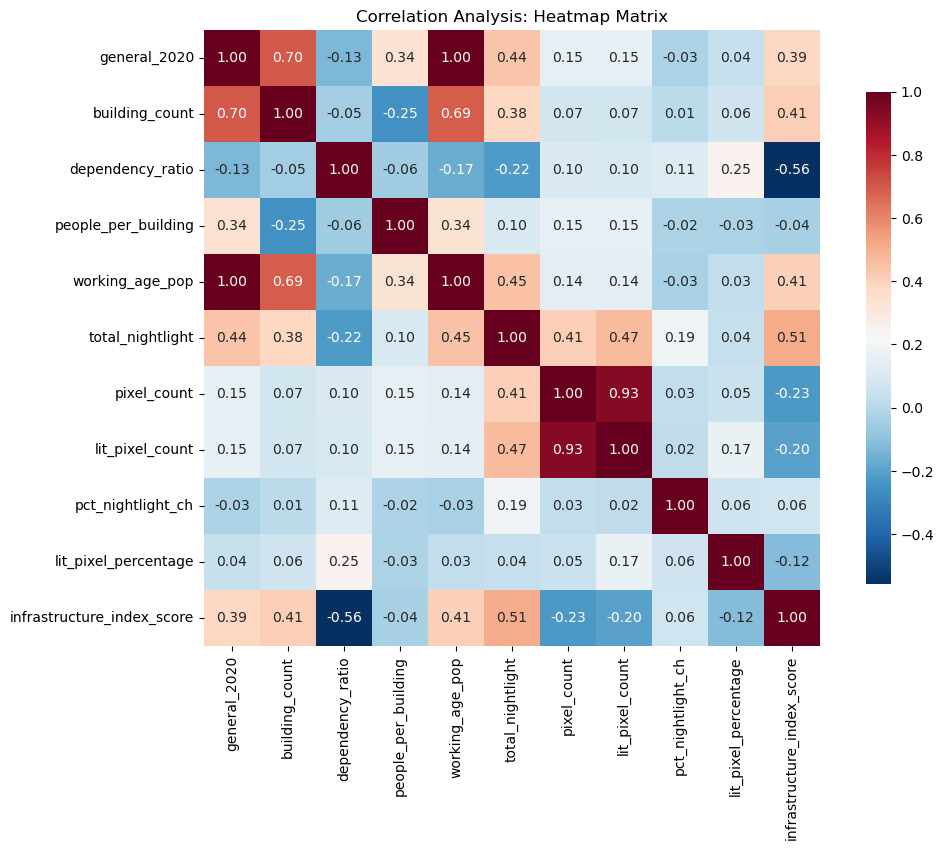

In [85]:
# Correlation analysis: 
# create a corr matrix & heatmap
#Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables).
# Create a correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
list_corr_heatmap = ['general_2020', 'building_count','dependency_ratio', 'people_per_building', 'working_age_pop','total_nightlight', 'pixel_count','lit_pixel_count',"pct_nightlight_ch", "lit_pixel_percentage",
                    "infrastructure_index_score"]

plt.figure(figsize=(12, 8))
corr_matrix = nightlight_pop_merged[list_corr_heatmap].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Analysis: Heatmap Matrix")
plt.show()

In [86]:
 # Top 3 variable pairs** with the highest correlations and interpret their relationships.
corr_matrix
corr_pairs = corr_matrix.unstack()
corr_pairs
highest_corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)
highest_corr_pairs

general_2020          general_2020                  1.000000
                      working_age_pop               0.998883
pixel_count           lit_pixel_count               0.932644
general_2020          building_count                0.697681
building_count        working_age_pop               0.691378
total_nightlight      infrastructure_index_score    0.509586
                      lit_pixel_count               0.467592
working_age_pop       total_nightlight              0.448074
general_2020          total_nightlight              0.439963
building_count        infrastructure_index_score    0.414916
total_nightlight      pixel_count                   0.413643
working_age_pop       infrastructure_index_score    0.406402
general_2020          infrastructure_index_score    0.385224
building_count        total_nightlight              0.383977
general_2020          people_per_building           0.336236
people_per_building   working_age_pop               0.336015
dependency_ratio      li

### 1. general_2020 &  working_age_population : working age population icreases with a growing population implying a a growing number of age category of 15-65 years old
#### 3. general_2020 & building_count: buildings per head increases with growing population
##### 3. total_nightlight & infrastructure_index_score : infrastructure index increases with high nightlight intensity

# Nightlight Trend Analysis

In [87]:
# Nightlight Trend Analysis
# 5 top and bottom 5 electrified districts in 2015-2024
top_5_nighlight_distr = nightlight_pop_merged.groupby("district_name")["pct_nightlight_ch"].mean().nlargest(5).reset_index()
top_5_nighlight_distr["pct_nightlight_ch"] = top_5_nighlight_distr["pct_nightlight_ch"].round(2).sort_values(ascending=False)
bottom_5_nighlight_distr = nightlight_pop_merged.groupby("district_name")["pct_nightlight_ch"].mean().nsmallest(5).reset_index()
[top_5_nighlight_distr, bottom_5_nighlight_distr]


[  district_name  pct_nightlight_ch
 0     Nyaruguru             438.71
 1     Nyagatare             378.74
 2      Bugesera             358.17
 3        Kirehe             319.52
 4         Ngoma             311.75,
   district_name  pct_nightlight_ch
 0    Nyarugenge          86.121965
 1        Rubavu         159.191786
 2      Kicukiro         193.889486
 3       Muhanga         195.381857
 4        Nyanza         199.513957]

In [48]:
# Top Five districts with highest nightlight (highest lit_pixel)
top_5_nightlights = nightlight_pop_merged.groupby("district_name")["lit_pixel_percentage"].mean().nlargest(5).reset_index()
top_5_nightlights["lit_pixel_percentage"] = top_5_nightlights["lit_pixel_percentage"].round(2)
top_5_nightlights

,district_name,lit_pixel_percentage
0,Kamonyi,44.84
1,Nyaruguru,44.78
2,Nyanza,44.46
3,Gisagara,44.17
4,Kayonza,44.05


C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_30372\3421739022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = nightlightsPixel_by_distr, x="pct_nightlight_ch", y="district_name", palette="inferno")
C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_30372\3421739022.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = nightlightsPixel_by_distr, x="lit_pixel_percentage", y="district_name", palette="inferno")


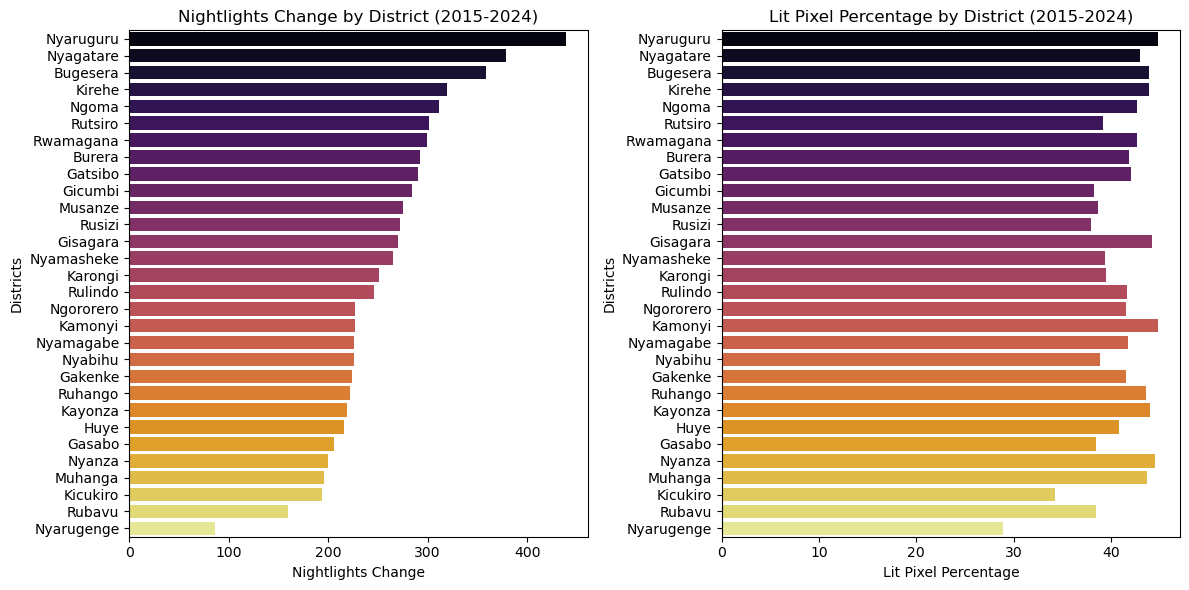

In [88]:
## Visualizations plot of Top Five districts with highest nightlight (highest lit_pixel)
nightlightsPixel_by_distr = nightlight_pop_merged.groupby("district_name")[["pct_nightlight_ch","lit_pixel_percentage"]].mean().reset_index()
nightlightsPixel_by_distr.sort_values(by="pct_nightlight_ch", ascending=False, inplace=True)
#districts_and_nightlight_changes.sort_values(by="lit_pixel_percentage", ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data = nightlightsPixel_by_distr, x="pct_nightlight_ch", y="district_name", palette="inferno")
plt.title("Nightlights Change by District (2015-2024)")
plt.xlabel("Nightlights Change")
plt.ylabel("Districts")

plt.subplot(1, 2, 2)
sns.barplot(data = nightlightsPixel_by_distr, x="lit_pixel_percentage", y="district_name", palette="inferno")
plt.title("Lit Pixel Percentage by District (2015-2024)")
plt.xlabel("Lit Pixel Percentage")
plt.ylabel("Districts")
plt.tight_layout()
plt.show()

### Observation : Distticts with higher nightlights changes correlated with higher lit pixels are locted in the countryside implying a conformity with Rwanda's rural electrification

# Modeling: Multivariate Linear Regression

In [89]:
# data cleaning and appropriation (drop and fill in missing)
nightlight_pop_merged.head(50)
nightlight_pop_merged.fillna(0, inplace=True) 
nightlight_pop_merged.dropna(subset = ["infrastructure_index_score"], inplace=True) 
nightlight_pop_merged.dropna(inplace=True)
nightlight_pop_merged["infrastructure_index_score"].fillna(0, inplace=True)
nightlight_pop_merged.size

C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_30372\2866816038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nightlight_pop_merged["infrastructure_index_score"].fillna(0, inplace=True)


164844

In [ ]:
# Multivariate linear regression model to estimate population density
# Variables and model selection
regressor_vars = nightlight_pop_merged[["general_2020", "building_count","total_nightlight", "pixel_count", "lit_pixel_count", "infrastructure_index_score",
                                     "dependency_ratio","working_age_pop", "lit_pixel_percentage", "pct_nightlight_ch",	"mean_pct_nightlight_ch", "buildings_per_km2","nightlights_per_km2"]]
#regressor_vars = nightlight_pop_merged[["general_2020","infrastructure_index_score","working_age_pop"]]
dependent_var = nightlight_pop_merged["Population_density"]

def multivariate_linear_regression(regressor_vars, dependent_var):
    """
    Function to perform multivariate regression analysis.
    
    Parameters:
    x (DataFrame): Independent variables.
    y (Series): Dependent variable.
    
    Returns:
    model_summary: Summary of the regression model.
    """
    # Set constant/intercept term as base for regressors 
    regressor_vars = sm.add_constant(regressor_vars)

    # Fitting the model
    reg_model = sm.OLS(dependent_var, regressor_vars).fit()

    print(reg_model.summary())   
multivariate_linear_regression(regressor_vars, dependent_var)


                            OLS Regression Results                            
Dep. Variable:     Population_density   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     2599.
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:22:10   Log-Likelihood:                -21912.
No. Observations:                4338   AIC:                         4.385e+04
Df Residuals:                    4324   BIC:                         4.394e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Normality of residuals
# Shapiro-Wilk test (for small-medium datasets) or Jarque-Bera test
from scipy.stats import shapiro
from statsmodels.stats.stattools import jarque_bera

def multivariate_linear_regression(regressor_vars, dependent_var):

    # Set constant/intercept term as base for regressors 
    regressor_vars = sm.add_constant(regressor_vars)

    # Fitting the model
    reg_model = sm.OLS(dependent_var, regressor_vars).fit()
    residuals = reg_model.resid  # residuals from your model

# Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(residuals)
    return("Shapiro-Wilk test:", shapiro_stat, "p-value:", shapiro_p)

# Jarque-Bera (from statsmodels)
    jb_stat, jb_p, skew, kurtosis = jarque_bera(residuals)
    return("Jarque-Bera test:", jb_stat, "p-value:", jb_p)
multivariate_linear_regression(regressor_vars, dependent_var)

('Shapiro-Wilk test:', 0.5065235553479357, 'p-value:', 1.7422181347797962e-76)

### p-value > 0.05 → fail to reject normality (residuals ~ normal) impying residuals do not deviate from normality (normal distribution of residuals)

In [107]:
# Homoscedasticity (constant variance)
# Breusch-Pagan test (from statsmodels)
from statsmodels.stats.diagnostic import het_breuschpagan
def multivariate_linear_regression(regressor_vars, dependent_var):

    # Set constant/intercept term as base for regressors 
    regressor_vars = sm.add_constant(regressor_vars)
 
    # Fitting the model
    reg_model = sm.OLS(dependent_var, regressor_vars).fit()
    residuals = reg_model.resid  # residuals from your model
# exog = predictors including constant
    bp_test = het_breuschpagan(residuals, reg_model.model.exog)
    bp_stat, bp_p, f_stat, f_p = bp_test
    return("Breusch-Pagan test statistic:", bp_stat, "p-value:", bp_p)
multivariate_linear_regression(regressor_vars, dependent_var)

('Breusch-Pagan test statistic:',
 1312.220490917615,
 'p-value:',
 1.238067218022443e-272)

#### p-vaue > 0.05 → fail to reject null → residuals are homoscedastic implying residuals exhibit a contant variance (a constant mean of errors)/ no heteroscedasticity

In [ ]:
# regression model of top 3 predictive indicators of population density 
import statsmodels.api as sm

# Define predictors (X) and outcome (y)
X = nightlight_pop_merged[["infrastructure_index_score", "pct_nightlight_ch", "working_age_pop"]]
y = nightlight_pop_merged["Population_density"]

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
reg_model = sm.OLS(y, X).fit()

# View summary
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Population_density   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2441.
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:20:09   Log-Likelihood:                -24487.
No. Observations:                4338   AIC:                         4.898e+04
Df Residuals:                    4334   BIC:                         4.901e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

'\n1. **R-squared**: This statistic indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R-squared value suggests a better fit for the model.\n\n2. **Coefficients**: The coefficients represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. For example, if the coefficient for "general_2020" is 0.5, it suggests that a one-unit increase in "general_2020" is associated with a 0.5 unit increase in population density.\n\n3. **Statistical Significance**: The p-values associated with each coefficient indicate whether the relationship is statistically significant. A common threshold for significance is 0.05. If a p-value is below this threshold, we can reject the null hypothesis \nand conclude that there is a significant relationship between the independent and dependent variables.\n\n4. **Infrastructure Index**: The coeffi

### Understanding/Interpreting the summary statisitcs
**Infrastructure Index**: stands out as the most significant predictive indicator of population density: A higher positive coefficient suggest a increase in population density as infrasture pressure incereases/ higher nighlights intensity